In [1]:
# Install Required Libraries
!pip install PyPDF2 textstat wordcloud nltk

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/toobaedhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/toobaedhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/toobaedhi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Briefly characterize the issue at hand and your impressions from a news reporting objectivity perspective:

Harvard President Claudine Gay faced plagiarism allegations in both articles. While Fox News emphasizes the accusations, Reuters focuses on her response and planned next steps. Fox’s tone is more critical and Reuters is more neutral/factual. This shows how different outlets frame and report on the same issue with varying levels of objectivity.


In [6]:
# Using PyPDF2 to extract the text out of each document
from PyPDF2 import PdfReader

fox_reader = PdfReader("Embattled Harvard University President Claudine Gay hit with more plagiarism charges (Fox News).pdf")
fox_pages = len(fox_reader.pages)
fox_text = " ".join(page.extract_text() for page in fox_reader.pages if page.extract_text())


reuters_reader = PdfReader("Harvard president will submit dissertation edits after plagiarism allegations (Reuters).pdf")
reuters_pages = len(reuters_reader.pages)
reuters_text = " ".join(page.extract_text() for page in reuters_reader.pages if page.extract_text())


print(fox_text[:1000])
print(reuters_text[:1000])


1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

Briefly note any anomalies in your notebook:
Fox relies heavily on secondary sources (The Free Beacon), while Reuters cites official statements and university actions.

In [9]:
# Using NLTK to complete sentiment analysis for each of the articles:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

fox_sentiment = sia.polarity_scores(fox_text)
reuters_sentiment = sia.polarity_scores(reuters_text)

print("Fox:", fox_sentiment)
print("Reuters:", reuters_sentiment)


Fox: {'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}
Reuters: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


Compare the results from the two articles. Compare the results to your reading of the articles; do you agree with the outcome?

The Fox News article reads as slightly positive overall (+0.83), while Reuters displays a more negative tone (−0.97).

Reuters’ result fits its cautious and serious tone discussing the president's allegations. However, Fox’s positive score seems misleading since we know that it was more critical than "positive". This means that this positive score is likely based of off quotes and phrases used in the article and not truly reflective of the overall messaging/perspective of the author.

In [12]:
# Running sentiment analysis on the article headlines:
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges (Fox News)"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations (Reuters)"

print("Fox headline:", sia.polarity_scores(fox_headline))
print("Reuters headline:", sia.polarity_scores(reuters_headline))


Fox headline: {'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.3353}
Reuters headline: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Do those results agree with the overall sentiment?

The Fox headline shows a negative tone (compound ≈ −0.33), which matches its more critical tone using terms like “embattled” and “charges.”
The Reuters headline is neutral (0.0), which is consistent with its factual and objective style.

In [15]:
# Using textstat to complete 2-3 different readability scores:
import textstat   
def readability_report(text, label):
    print(f"{label} Flesch Reading Ease:", textstat.flesch_reading_ease(text))
    print(f"{label} Gunning Fog Index:", textstat.gunning_fog(text))
    print(f"{label} SMOG Index:", textstat.smog_index(text))

# Comparing readability of both articles
readability_report(fox_text, "Fox News")
readability_report(reuters_text, "Reuters")

Fox News Flesch Reading Ease: 21.704491315136494
Fox News Gunning Fog Index: 21.0848635235732
Fox News SMOG Index: 18.326425776900052
Reuters Flesch Reading Ease: 24.638152515723306
Reuters Gunning Fog Index: 18.72012578616352
Reuters SMOG Index: 16.827784334635936


Important Note: I was having issues with the py-readability-metrics package. It continued to display an error and so I used ChatGPT to find an alternative. This is why I used the textstat package because it was more stable. 

Discuss what the chosen metric is measuring. Compare the scores from both articles:
The Flesch Reading Ease score measures how easy a text is to read. A higher scores means the simpler the language. The Gunning Fog Index and SMOG Index estimate the years of education needed to understand the text. A higher number means the greater the complexity.

Comparison:
Reuters has slightly higher readability with a Flesch of about 24.6 versus the Fox News article which is about 21.7. This means that Reuters is a a bit easier to read in comparison.
Fox News scores higher on Fog and SMOG scales and we can verify that by looking at the use of longer sentences and more complex phrasing throughout the article.
Overall, Reuters is written more clearly, concisely and easier to read, while Fox uses denser, more formal language.


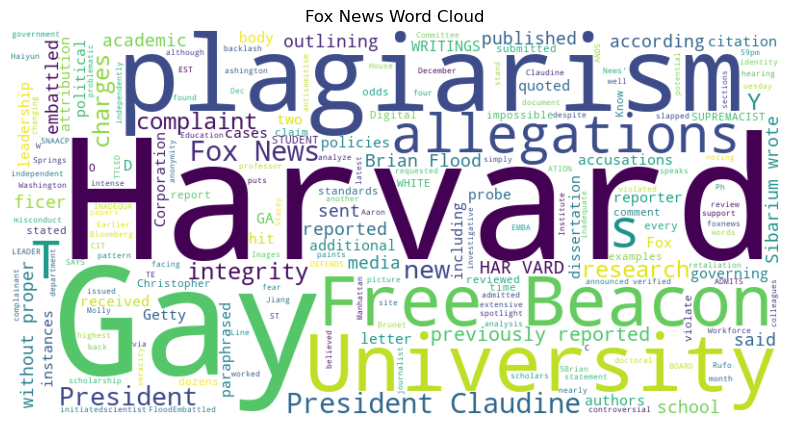

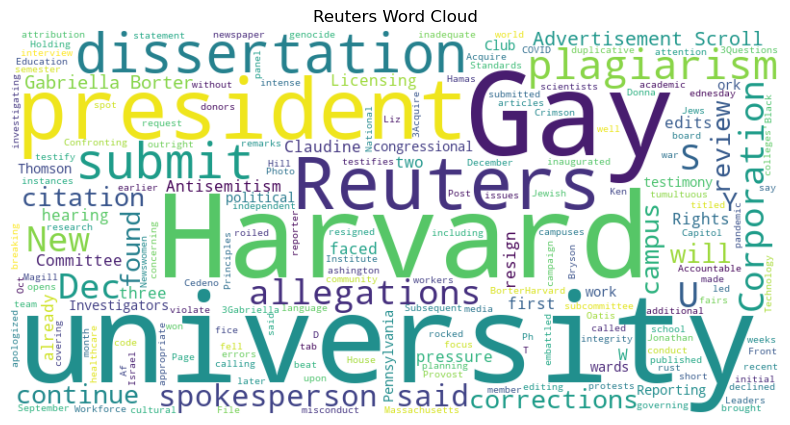

In [17]:
# Creating word clouds for both articles:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generating word clouds for each article
show_wordcloud(fox_text, "Fox News Word Cloud")
show_wordcloud(reuters_text, "Reuters Word Cloud")

Briefly comment on the word clouds:

The Fox News word cloud focuses on charged and assertive terms such as “plagiarism,” “allegations,” “charges,” and “embattled”, indicating a more critical take. 

Conversely, the Reuters word cloud uses a more neutral vocabulary, including terms like “submit,” “dissertation,” “spokesperson,” and “corrections.” This reflects a factual and objective reporting style.